In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/Wholesale customers data.csv')

In [3]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
data.shape

(440, 8)

Clustering

In [7]:
from sklearn.cluster import KMeans

In [9]:
wcss = []
for i in range(1,11):
  km = KMeans(n_clusters = i,n_init=10,init = 'k-means++')
  km.fit(data)
  css = km.inertia_ #wcss score
  wcss.append(css)

In [10]:
wcss

[157595857524.96133,
 113217528878.79834,
 80333265953.4602,
 64855740346.12363,
 52928149261.51565,
 46753804596.88029,
 41233923256.64024,
 36156280350.50956,
 33744029910.492508,
 30123335890.394646]

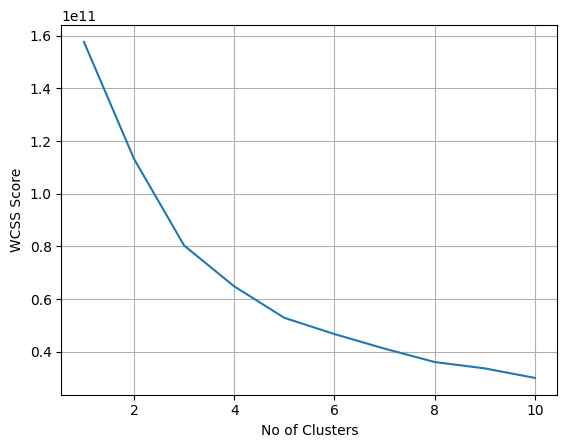

In [11]:
plt.plot(range(1,11),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS Score')
plt.grid()
plt.show()

In [12]:
km = KMeans(n_clusters = 5,n_init=10,init = 'k-means++')

In [13]:
km.fit(data)

KMeans(n_clusters=5, n_init=10)

In [14]:
cluster_labels = km.predict(data)

In [15]:
cluster_labels

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1,
       0, 2, 0, 0, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 4, 0, 0, 2, 2,
       1, 2, 2, 3, 1, 2, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 1, 3, 1, 2, 1, 2,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 2, 1, 1, 1, 2, 1, 0, 1, 3, 3, 4,
       1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 4, 1, 0, 1, 2, 1, 2,
       1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 4, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 2, 2, 0, 1, 2, 1, 1, 0, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       4, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1,
       1, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 2, 0, 2, 1, 1, 1, 2, 2, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 4, 0, 0,
       0, 1, 1, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 0, 1, 1, 4, 4, 1, 1, 0, 1,
       2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 4, 0, 4, 0,
       1, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0, 1, 1, 1, 0,

In [16]:
pd.Series(cluster_labels).value_counts()

1    241
0    107
2     74
4     13
3      5
dtype: int64

In [17]:
cluster_indices = np.where(cluster_labels==0)

In [18]:
cluster_indices

(array([  4,  12,  13,  14,  18,  20,  22,  24,  25,  29,  30,  32,  33,
         36,  40,  41,  52,  54,  67,  70,  71,  73,  75,  83,  89, 105,
        112, 114, 118, 120, 124, 126, 127, 129, 140, 141, 142, 144, 149,
        150, 152, 157, 162, 190, 195, 196, 202, 210, 217, 226, 232, 234,
        237, 240, 241, 242, 248, 253, 255, 262, 267, 273, 276, 279, 283,
        285, 287, 288, 289, 294, 296, 300, 307, 311, 322, 324, 328, 332,
        334, 335, 347, 356, 360, 368, 370, 371, 373, 377, 380, 381, 382,
        387, 393, 401, 402, 403, 404, 406, 421, 422, 423, 424, 427, 432,
        434, 435, 436]),)

In [19]:
data['cluster_labels'] = cluster_labels

In [20]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,2,3,12669,9656,7561,214,2674,1338,1
1,2,3,7057,9810,9568,1762,3293,1776,1
2,2,3,6353,8808,7684,2405,3516,7844,1
3,1,3,13265,1196,4221,6404,507,1788,1
4,2,3,22615,5410,7198,3915,1777,5185,0


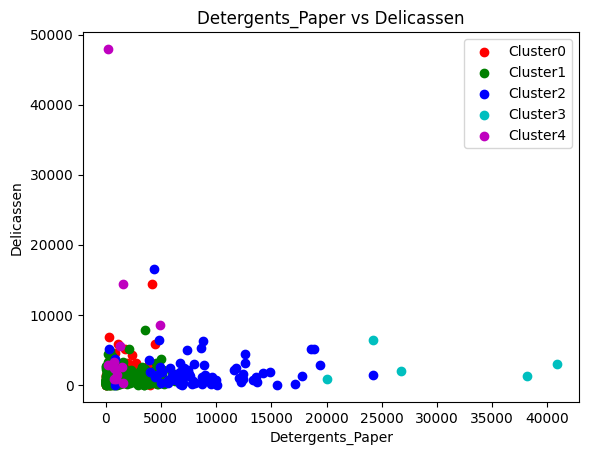

In [21]:
colors = ['r','g','b','c','m']

for i in range(max(cluster_labels)+1):
  cluster_data = data[cluster_labels==i]
  plt.scatter(cluster_data['Detergents_Paper'],
              cluster_data['Delicassen'],
              c = colors[i],
              label =f'Cluster{i}')
plt.xlabel('Detergents_Paper')
plt.ylabel('Delicassen')
plt.title('Detergents_Paper vs Delicassen')
plt.legend()


Agglomerative Hierarachical clustering

In [24]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster


In [25]:
mergings = linkage(data,method='ward')

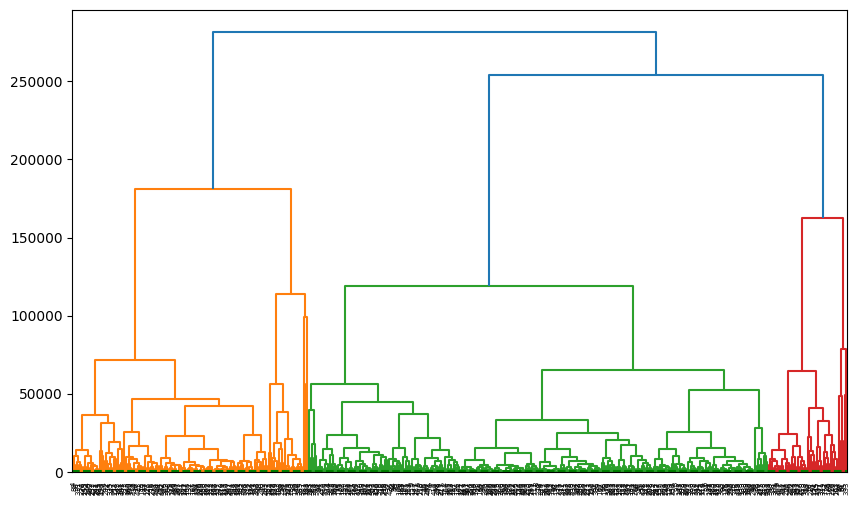

In [26]:
plt.figure(figsize=(10,6))
dendrogram(mergings)
plt.axhline(350,color='green',linestyle='--')
plt.show()

In [27]:
cluster_labels_hc = fcluster(mergings,200000,criterion = 'distance')

In [28]:
cluster_labels_hc

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2,
       1, 2, 1, 1, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2, 1, 2, 3, 1, 1, 1, 2, 3,
       2, 3, 3, 3, 2, 3, 2, 2, 1, 2, 1, 2, 3, 2, 1, 2, 2, 3, 2, 2, 2, 3,
       2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 1, 2, 3, 3, 1,
       2, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 3,
       2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 2, 2, 1, 1, 2, 1, 2,
       2, 3, 2, 1, 2, 2, 2, 1, 1, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2,
       1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 3, 2, 1, 1, 2,
       2, 2, 3, 3, 1, 2, 2, 3, 2, 2, 2, 3, 1, 3, 2, 2, 2, 2, 3, 1, 2, 2,
       1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 2, 2, 3, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 2, 3, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1,

Silhouette score

In [29]:
from sklearn.metrics import silhouette_score

In [30]:
sil_score = silhouette_score(data,cluster_labels_hc)
sil_score

0.3750155191720298

In [31]:
data.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
Channel,1.000000,0.062028,-0.169172,0.460720,0.608792,-0.202046,0.636026,0.056011,0.290960
Region,0.062028,1.000000,0.055287,0.032288,0.007696,-0.021044,-0.001483,0.045212,-0.036989
Fresh,-0.169172,0.055287,1.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690,0.027023
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368,0.464810
Grocery,0.608792,0.007696,-0.011854,0.728335,1.000000,-0.040193,0.924641,0.205497,0.495351
Frozen,-0.202046,-0.021044,0.345881,0.123994,-0.040193,1.000000,-0.131525,0.390947,0.165988
Detergents_Paper,0.636026,-0.001483,-0.101953,0.661816,0.924641,-0.131525,1.000000,0.069291,0.473849
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000,0.230871
cluster_labels,0.290960,-0.036989,0.027023,0.464810,0.495351,0.165988,0.473849,0.230871,1.000000


In [32]:
data.mean()

Channel                 1.322727
Region                  2.543182
Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicassen           1524.870455
cluster_labels          1.036364
dtype: float64

In [33]:
data.var()

Channel             2.190723e-01
Region              5.994978e-01
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicassen          7.952997e+06
cluster_labels      7.230483e-01
dtype: float64

In [34]:
data.shape

(440, 9)

In [36]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen', 'cluster_labels'],
      dtype='object')

Scaling

In [38]:
from sklearn.preprocessing import scale

In [39]:
x = pd.DataFrame(scale(data),index=data.index,columns=data.columns)

In [40]:
x

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_labels
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339,-0.042813
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151,-0.042813
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293,-0.042813
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411,-0.042813
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347,-1.220176
...,...,...,...,...,...,...,...,...,...
435,-0.690297,0.590668,1.401312,0.848446,0.850760,2.075222,-0.566831,0.241091,-1.220176
436,-0.690297,0.590668,2.155293,-0.592142,-0.757165,0.296561,-0.585519,0.291501,-1.220176
437,1.448652,0.590668,0.200326,1.314671,2.348386,-0.543380,2.511218,0.121456,1.134550
438,-0.690297,0.590668,-0.135384,-0.517536,-0.602514,-0.419441,-0.569770,0.213046,-0.042813


PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pc = PCA()

In [43]:
pc_array = pc.fit_transform(x)

In [44]:
pc_array

array([[ 0.73273056, -0.61925744, -0.83079752, ..., -0.91857785,
         0.66265941,  0.01872605],
       [ 0.94542891, -0.60429402, -0.7375974 , ..., -0.75308947,
         0.50981143,  0.07686908],
       [ 1.18457737,  0.51844125, -0.81823075, ..., -1.08544493,
        -0.20057545, -0.25606573],
       ...,
       [ 3.98707118, -0.70372449, -0.59077524, ...,  0.25354778,
        -0.57513255, -0.08851445],
       [-1.05427838,  0.02408086, -0.53341815, ...,  0.11327438,
        -0.13638355, -0.03375599],
       [-1.15024213, -0.78318242, -0.43696721, ...,  0.32664788,
         0.0399932 ,  0.02261292]])

In [45]:
pc_array.shape

(440, 9)

In [47]:
pc_array = pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9'])

In [48]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.732731,-0.619257,-0.830798,-0.131621,0.412788,0.003538,-0.918578,0.662659,0.018726
1,0.945429,-0.604294,-0.737597,0.301180,0.445676,0.301508,-0.753089,0.509811,0.076869
2,1.184577,0.518441,-0.818231,1.284170,1.577883,-0.348669,-1.085445,-0.200575,-0.256066
3,-0.977472,0.699077,-0.425879,0.341372,-0.459327,0.209631,0.120435,-0.309808,0.055580
4,0.188113,0.694559,-1.129729,-0.309018,1.708131,0.447636,-1.173624,-0.196335,-0.007944
...,...,...,...,...,...,...,...,...,...
435,-0.101214,2.247026,-0.701392,-0.859641,0.401531,1.472404,1.003264,0.263766,0.843749
436,-1.583771,1.467365,-0.989067,-1.538413,0.501256,-0.070642,-0.096062,-0.268374,-0.235033
437,3.987071,-0.703724,-0.590775,-0.643302,-0.273341,-0.043443,0.253548,-0.575133,-0.088514
438,-1.054278,0.024081,-0.533418,0.410895,-0.118904,-0.640486,0.113274,-0.136384,-0.033756


In [49]:
pc.explained_variance_

array([3.43857434, 1.82452556, 1.03093466, 0.74743261, 0.6716241 ,
       0.51526657, 0.44812296, 0.281149  , 0.06287134])

In [50]:
pc.explained_variance_ratio_*100

array([38.11954882, 20.2264323 , 11.42879584,  8.28593223,  7.44552984,
        5.71217233,  4.96782777,  3.11677806,  0.69698282])

In [51]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9
0,0.732731,-0.619257,-0.830798,-0.131621,0.412788,0.003538,-0.918578,0.662659,0.018726
1,0.945429,-0.604294,-0.737597,0.301180,0.445676,0.301508,-0.753089,0.509811,0.076869
2,1.184577,0.518441,-0.818231,1.284170,1.577883,-0.348669,-1.085445,-0.200575,-0.256066
3,-0.977472,0.699077,-0.425879,0.341372,-0.459327,0.209631,0.120435,-0.309808,0.055580
4,0.188113,0.694559,-1.129729,-0.309018,1.708131,0.447636,-1.173624,-0.196335,-0.007944
...,...,...,...,...,...,...,...,...,...
435,-0.101214,2.247026,-0.701392,-0.859641,0.401531,1.472404,1.003264,0.263766,0.843749
436,-1.583771,1.467365,-0.989067,-1.538413,0.501256,-0.070642,-0.096062,-0.268374,-0.235033
437,3.987071,-0.703724,-0.590775,-0.643302,-0.273341,-0.043443,0.253548,-0.575133,-0.088514
438,-1.054278,0.024081,-0.533418,0.410895,-0.118904,-0.640486,0.113274,-0.136384,-0.033756


In [52]:
pc1 = PCA(n_components= 3)

In [53]:
pc1_array = pc1.fit_transform(x)

In [54]:
pc_array = pd.DataFrame(pc1_array,columns=['pc1','pc2','pc3'])

In [55]:
pc_array

,pc1,pc2,pc3
0,0.732731,-0.619257,-0.830798
1,0.945429,-0.604294,-0.737597
2,1.184577,0.518441,-0.818231
3,-0.977472,0.699077,-0.425879
4,0.188113,0.694559,-1.129729
...,...,...,...
435,-0.101214,2.247026,-0.701392
436,-1.583771,1.467365,-0.989067
437,3.987071,-0.703724,-0.590775
438,-1.054278,0.024081,-0.533418


In [56]:
pc1.explained_variance_ratio_*100

array([38.11954882, 20.2264323 , 11.42879584])